<a href="https://colab.research.google.com/github/a5hi-k/ML_Projects/blob/main/classification_proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PATIENT TREATMENT IN OR OUT CLASSIFICATION**
# **USING KNN,NAIVE BAYES,SVM AND LOGISTIC REGRESSION**

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/data-ori_altered.csv')
data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310.0,25.4,33.6,75.5,1.0,F,out
1,43.5,14.8,5.39,12.7,334.0,27.5,34.0,80.7,1.0,F,out
2,NaN,11.3,4.74,13.2,305.0,23.8,33.7,70.7,1.0,NaN,out
3,?,13.7,4.98,10.5,366.0,27.5,35.0,78.5,1.0,F,out
4,30.9,9.9,4.23,22.1,333.0,23.4,32.0,73.0,1.0,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72.0,29.8,31.7,94.0,92.0,F,in
4408,33.7,10.8,3.67,6.7,70.0,29.4,32.0,91.8,92.0,F,in
4409,33.2,11.2,3.47,7.2,235.0,32.3,33.7,95.7,93.0,F,out
4410,31.5,10.4,3.15,9.1,187.0,33.0,33.0,100.0,98.0,F,in


In [186]:
data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310.0,25.4,33.6,75.5,1.0,F,out
1,43.5,14.8,5.39,12.7,334.0,27.5,34.0,80.7,1.0,F,out
2,NaN,11.3,4.74,13.2,305.0,23.8,33.7,70.7,1.0,NaN,out
3,?,13.7,4.98,10.5,366.0,27.5,35.0,78.5,1.0,F,out
4,30.9,9.9,4.23,22.1,333.0,23.4,32.0,73.0,1.0,M,out


In [187]:
data.tail()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
4407,32.8,10.4,3.49,8.1,72.0,29.8,31.7,94.0,92.0,F,in
4408,33.7,10.8,3.67,6.7,70.0,29.4,32.0,91.8,92.0,F,in
4409,33.2,11.2,3.47,7.2,235.0,32.3,33.7,95.7,93.0,F,out
4410,31.5,10.4,3.15,9.1,187.0,33.0,33.0,100.0,98.0,F,in
4411,33.5,10.9,3.44,5.8,275.0,31.7,32.5,97.4,99.0,F,out


In [188]:
data.columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

In [189]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4409 non-null   object 
 1   HAEMOGLOBINS  4408 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4402 non-null   float64
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4407 non-null   float64
 9   SEX           4406 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(8), object(3)
memory usage: 379.3+ KB


# Data Preprocessing

In [190]:
# Checking for unigue values in column 'HAEMATOCRIT'
data.HAEMATOCRIT.unique()


array(['35.1', '43.5', nan, '?', '30.9', '34.3', '31.1', '40.3', '33.6',
       '35.4', '33.7', '54', '31.7', '35.3', '34.5', '34', '35', '51.3',
       '31.3', '36.8', '36.5', '53', '34.6', '34.7', '32.5', '25.4',
       '37.3', '44.2', '41.2', '41', '43.6', '38.4', '33.4', '28.1',
       '32.3', '37.4', '32.7', '33.5', '38.5', '36.2', '45.4', '35.8',
       '37.8', '39.3', '41.6', '44.8', '44', '35.7', '30.6', '33.9',
       '37.9', '39.1', '33.3', '35.9', '36.7', '38.2', '38.3', '36.3',
       '32.1', '39.5', '32.4', '36.1', '34.4', '26.7', '33.1', '30.1',
       '40', '34.8', '42.2', '37.7', '41.5', '43', '38', '36.4', '37.5',
       '39.6', '39.9', '32.9', '35.2', '36.6', '34.2', '41.4', '38.1',
       '38.8', '36', '32.8', '24.2', '36.9', '39.4', '43.2', '39.2',
       '43.7', '37.2', '31.9', '41.7', '32.2', '40.1', '38.7', '40.8',
       '32', '34.1', '46.4', '37', '29.8', '37.1', '44.1', '37.6', '28.9',
       '42.3', '35.6', '42', '39.7', '42.6', '41.9', '41.3', '40.7',
      

In [191]:
# The column contains '?' character

data.HAEMATOCRIT.replace('?',np.NaN,inplace=True)


In [192]:
# checking for missing values

data.isna().sum()

HAEMATOCRIT      6
HAEMOGLOBINS     4
ERYTHROCYTE      0
LEUCOCYTE        0
THROMBOCYTE     10
MCH              0
MCHC             0
MCV              0
AGE              5
SEX              6
SOURCE           0
dtype: int64

In [193]:
# Dropping duplicates if there is any

data.drop_duplicates(inplace=True)

# Data Visualization

<ipython-input-194-84adcf6404c8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='Blues')


<Axes: >

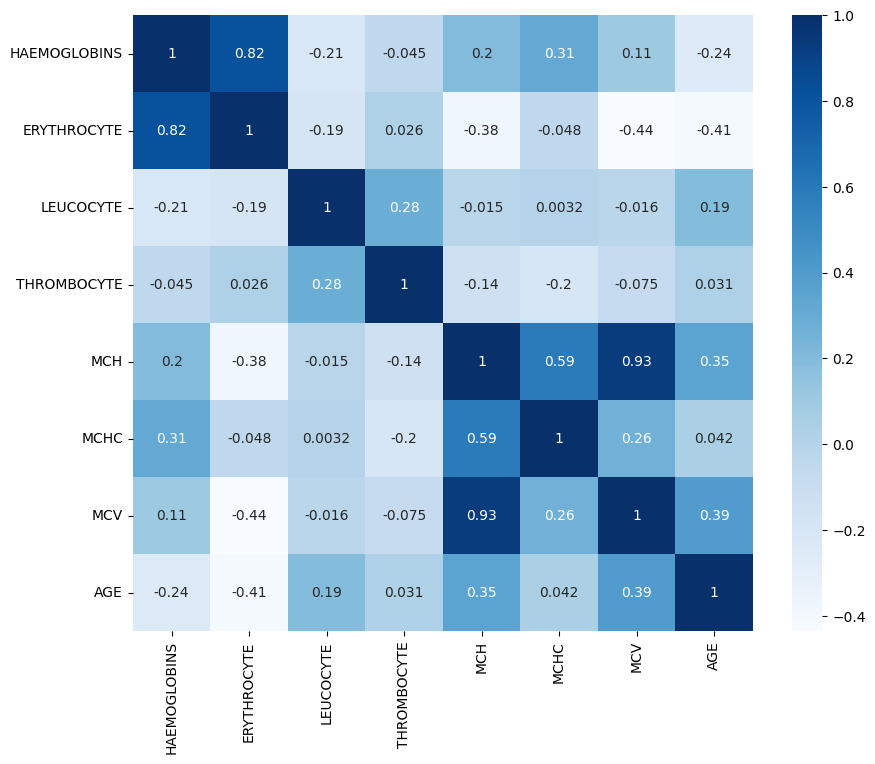

In [194]:
from matplotlib import colors
# correlation between each features

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

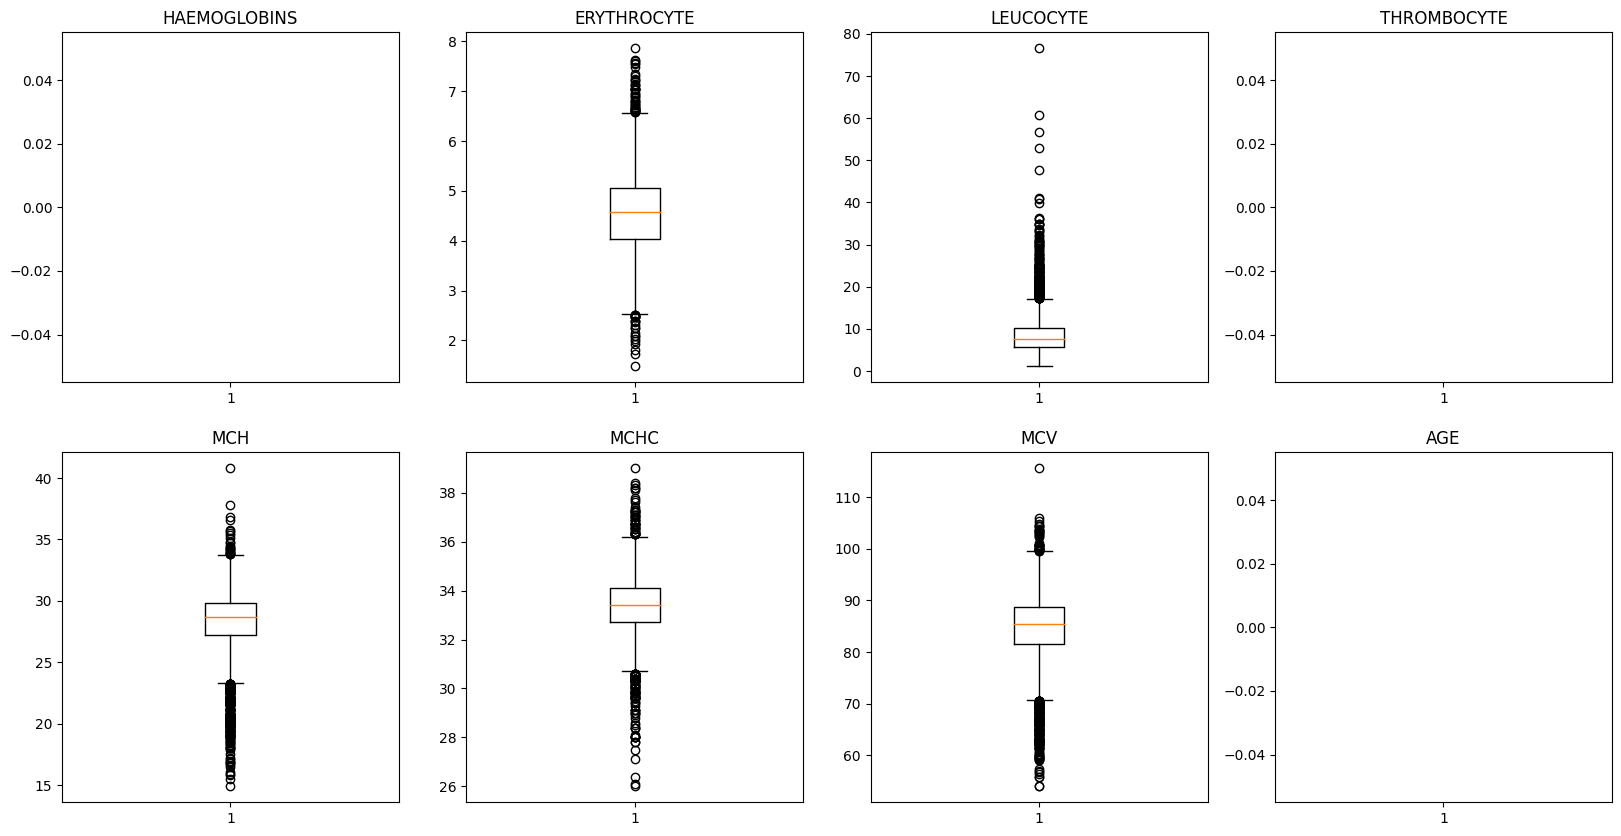

In [195]:
# Plotting box plot to look for outliers

plt.figure(figsize=(20,10))
k=1
for i in data.columns:
  if data[i].dtype!='object':

    plt.subplot(2,4,k)
    plt.boxplot(data[i].values)
    plt.title(i)
    k+=1
plt.show()

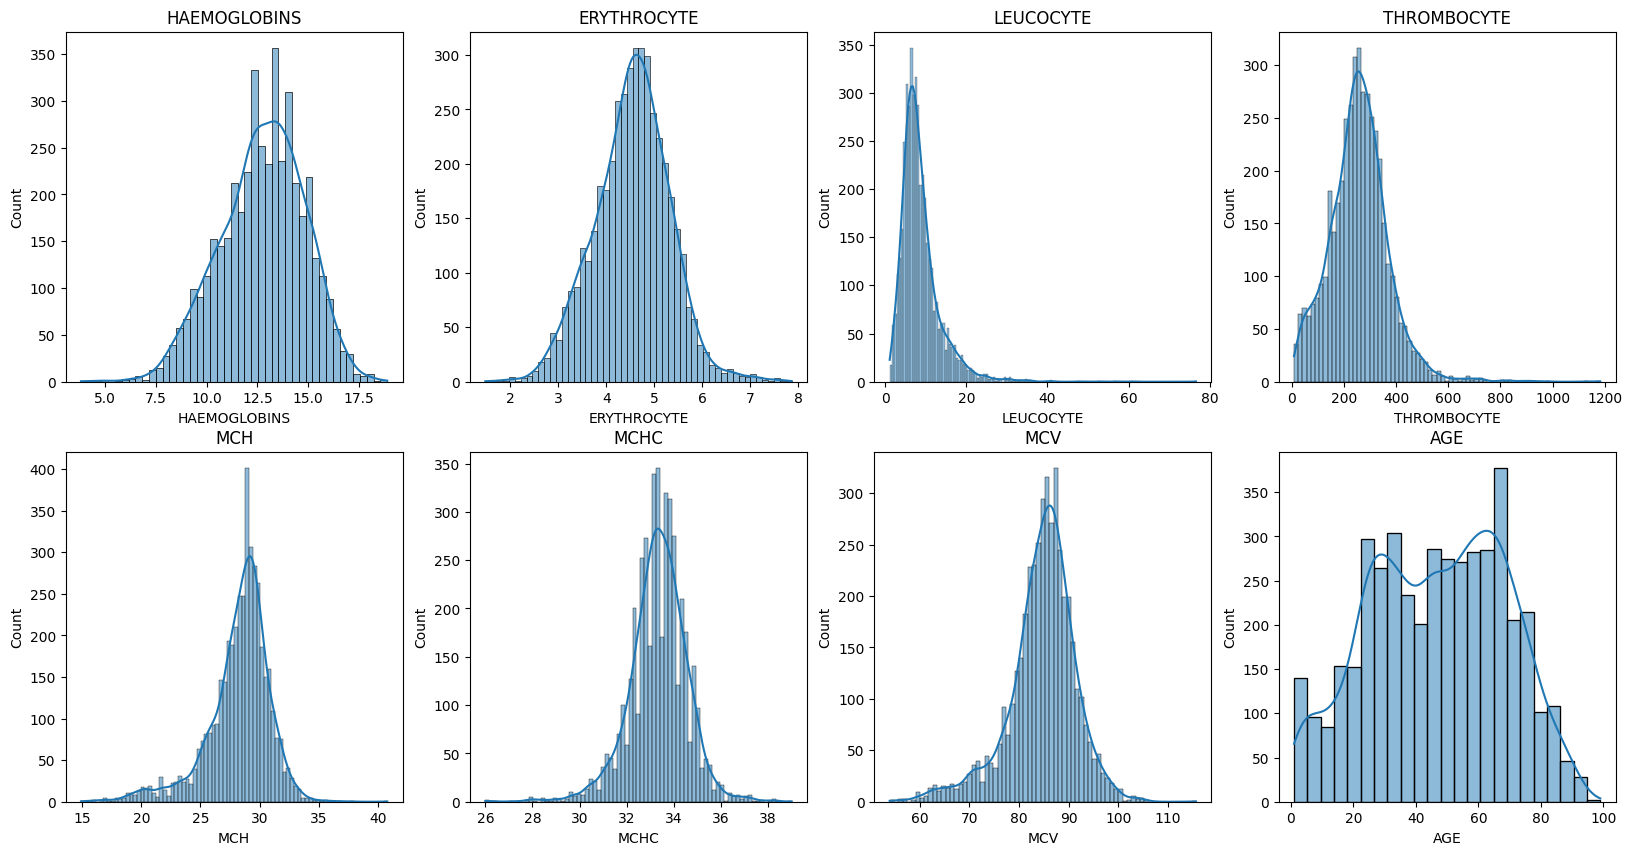

In [196]:
# Plotting histogram to see frequency distribution of features

plt.figure(figsize=(20,10))
k=1
for i in data.columns:
  if data[i].dtype!='object':

    plt.subplot(2,4,k)
    # plt.hist(data[i].values)
    sns.histplot(data=data,x=i,kde=True)
    plt.title(i)
    k+=1
plt.show()

In [197]:
# Seperating to features and labels

x=data.iloc[:,:-1]
y=data.iloc[:,-1]

print(x[:5])
print(y[:5])

  HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0        35.1          11.8         4.65        6.3        310.0  25.4  33.6   
1        43.5          14.8         5.39       12.7        334.0  27.5  34.0   
2         NaN          11.3         4.74       13.2        305.0  23.8  33.7   
3         NaN          13.7         4.98       10.5        366.0  27.5  35.0   
4        30.9           9.9         4.23       22.1        333.0  23.4  32.0   

    MCV  AGE  SEX  
0  75.5  1.0    F  
1  80.7  1.0    F  
2  70.7  1.0  NaN  
3  78.5  1.0    F  
4  73.0  1.0    M  
0    out
1    out
2    out
3    out
4    out
Name: SOURCE, dtype: object


In [198]:
# Splitting the featurea and labels to test and train sets

from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

print(x_train[:1])
print(x_test[:1])
print(y_train[:1])
print(y_test[:1])

    HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  \
839        36.6          11.7         4.56        4.7        147.0  25.7   

     MCHC   MCV   AGE SEX  
839  32.0  80.3  25.0   F  
     HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  \
2447        45.2          15.7         5.26       11.8        343.0  29.8   

      MCHC   MCV   AGE SEX  
2447  34.7  85.9  52.0   M  
839    in
Name: SOURCE, dtype: object
2447    out
Name: SOURCE, dtype: object


# Data preprocessing and model fitting using pipeline

* Column 'AGE' is arranged in ascending order and contain multiple values therefore KNNImputer is best for imputing
*Column 'HAEMATOCRIT','HAEMOGLOBINS' and 'THROMBOCYTE' can be imputed using simpleimputer with strategy mean
*Column 'SEX' can be imputed using simpleimputer with strategy most_frequent
*Column 'SEX' has to be encoded
   

In [199]:
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder


preprocessor=ColumnTransformer(
    transformers=[
        ('knn',KNNImputer(n_neighbors=4,weights='uniform'),[8]),
        ('simplem',SimpleImputer(strategy='mean'),[0,1,4]),
        ('simplef',Pipeline([
            ('impute',SimpleImputer(strategy='most_frequent')),
            ('onhot',OneHotEncoder(handle_unknown='ignore'))
        ]),[9])
    ]
)


Accuracy score for knn : 0.7265861027190332
              precision    recall  f1-score   support

          in       0.68      0.62      0.65       540
         out       0.75      0.80      0.78       784

    accuracy                           0.73      1324
   macro avg       0.72      0.71      0.71      1324
weighted avg       0.72      0.73      0.72      1324



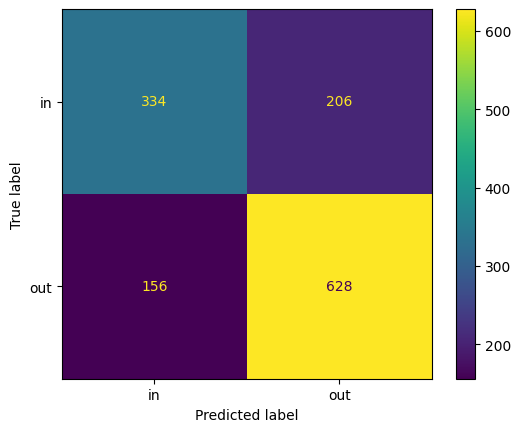

In [200]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report



pipe1 = Pipeline([
    ('preprocessor',preprocessor),
    ('scalar',StandardScaler()),
    ('model',KNeighborsClassifier())
])

pipe1.fit(x_train,y_train)

y_pred=pipe1.predict(x_test)

print(f'Accuracy score for knn : {accuracy_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))

labels=['in','out']
met=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=labels)
met.plot()







Accuracy score for gaussiannb : 0.7265861027190332
              precision    recall  f1-score   support

          in       0.68      0.62      0.65       540
         out       0.75      0.80      0.78       784

    accuracy                           0.73      1324
   macro avg       0.72      0.71      0.71      1324
weighted avg       0.72      0.73      0.72      1324



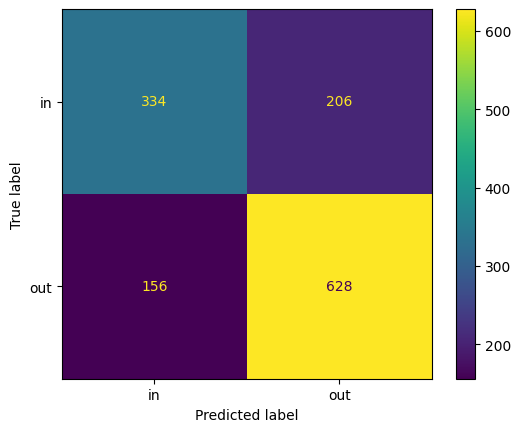

In [201]:
pipe2 = Pipeline([
    ('preprocessor',preprocessor),
    ('scalar',StandardScaler()),
    ('model',GaussianNB())
])

pipe2.fit(x_train,y_train)

y_pred=pipe1.predict(x_test)

print(f'Accuracy score for gaussiannb : {accuracy_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))

labels=['in','out']
met=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=labels)
met.plot()





Accuracy score for SVC : 0.7265861027190332
              precision    recall  f1-score   support

          in       0.68      0.62      0.65       540
         out       0.75      0.80      0.78       784

    accuracy                           0.73      1324
   macro avg       0.72      0.71      0.71      1324
weighted avg       0.72      0.73      0.72      1324



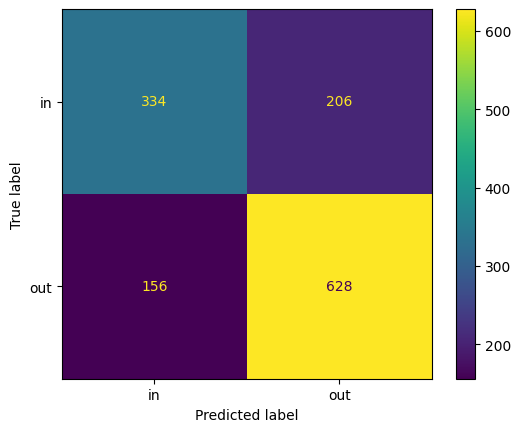

In [202]:
pipe3 = Pipeline([
    ('preprocessor',preprocessor),
    ('scalar',StandardScaler()),
    ('model',SVC())
])

pipe3.fit(x_train,y_train)

y_pred=pipe1.predict(x_test)

print(f'Accuracy score for SVC : {accuracy_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))

labels=['in','out']
met=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=labels)
met.plot()





Accuracy score for Logistic regressor : 0.7265861027190332
              precision    recall  f1-score   support

          in       0.68      0.62      0.65       540
         out       0.75      0.80      0.78       784

    accuracy                           0.73      1324
   macro avg       0.72      0.71      0.71      1324
weighted avg       0.72      0.73      0.72      1324



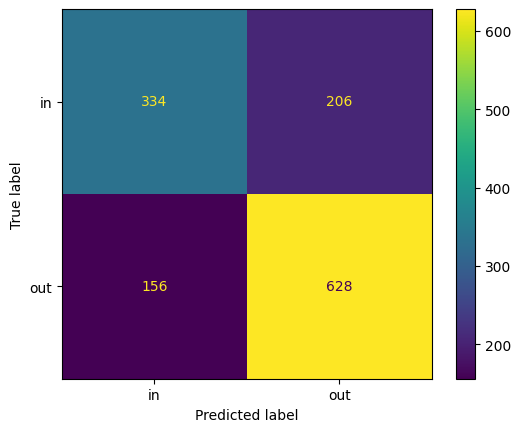

In [203]:
pipe4 = Pipeline([
    ('preprocessor',preprocessor),
    ('scalar',StandardScaler()),
    ('model',LogisticRegression())
])

pipe4.fit(x_train,y_train)

y_pred=pipe1.predict(x_test)

print(f'Accuracy score for Logistic regressor : {accuracy_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))

labels=['in','out']
met=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=labels)
met.plot()



